# AC209b - Final Project 
## Visualization and Analysis of relative OTU ratio's over time.
### Which are relatively the most prevalent OTU's and what about the biodiversity in Healthy versus IBD mice?


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# Reading the data
with open('mouse_set_1_data.pkl', 'rb') as f:
    mouse_1 = pickle.load(f)

with open('mouse_set_2_data.pkl', 'rb') as f:
    mouse_2 = pickle.load(f)
    
def get_mouse_data(mouse_num, column):
    """ helper function to get mouse data """
    if mouse_num <= 5:
        if column in['reads','qpcr']:
            return mouse_1[column][str(mouse_num)]
        else:
            return mouse_1[column]
    else:
        if column in['reads','qpcr']:
            return mouse_2[column][str(mouse_num)]
        else:
            return mouse_2[column]

In [0]:
# Preprocessing the data for some plotting
data = {}
for mouse in range(2,11):
  data[mouse]={}
  for sort_data in ['reads', 'qpcr', 'times', 'otu_taxonomy']:
    data[mouse][sort_data] = get_mouse_data(mouse, sort_data)
  data[mouse]['reads_perc']=data[mouse]['reads'].copy()
  data[mouse]['reads_quant_mean']=data[mouse]['reads'].copy()
  data[mouse]['reads_quant_std']=data[mouse]['reads'].copy()
  for t in data[mouse]['reads'].keys():
    summation_at_time_point = (data[mouse]['reads'][t]).sum()
    data[mouse]['reads_perc'][t] = data[mouse]['reads'][t]/summation_at_time_point
    data[mouse]['reads_quant_mean'][t] = data[mouse]['reads_perc'][t]*data[mouse]['qpcr']['mean'][t]
    data[mouse]['reads_quant_std'][t]  = data[mouse]['reads_perc'][t]*data[mouse]['qpcr']['std'][t]

### Which are the top 10 most prevalent OTU's over the all reads in each mouse individually?

In [0]:
# Top 10 OTU's for every mouse
best_10={}
for mouse in range(2,11):
  quant_perc = data[mouse]['reads_quant_mean'].values
  quant_perc = np.sum(quant_perc, axis=1)
  index = np.argsort(quant_perc)
  best_10[mouse] = [int(s[4:]) for s in data[mouse]['reads_quant_mean'].index[index[-1:-11:-1]].values]
  print("The Top 10 Most prevalant OTU's for mouse ", mouse, " are (most important first):\n", best_10[mouse])

The Top 10 Most prevelant OTU's for mouse  2  are :
 [5, 4, 6, 1, 2, 8, 10, 7, 17, 15]
The Top 10 Most prevelant OTU's for mouse  3  are :
 [5, 4, 2, 1, 6, 7, 10, 17, 14, 8]
The Top 10 Most prevelant OTU's for mouse  4  are :
 [5, 4, 2, 12, 1, 6, 8, 10, 19, 15]
The Top 10 Most prevelant OTU's for mouse  5  are :
 [4, 5, 12, 2, 1, 17, 6, 13, 7, 15]
The Top 10 Most prevelant OTU's for mouse  6  are :
 [3, 1, 2, 6, 9, 11, 7, 10, 18, 13]
The Top 10 Most prevelant OTU's for mouse  7  are :
 [3, 1, 2, 9, 6, 11, 7, 10, 13, 20]
The Top 10 Most prevelant OTU's for mouse  8  are :
 [3, 1, 2, 6, 9, 11, 7, 10, 13, 18]
The Top 10 Most prevelant OTU's for mouse  9  are :
 [3, 1, 2, 9, 6, 11, 7, 10, 13, 18]
The Top 10 Most prevelant OTU's for mouse  10  are :
 [3, 2, 1, 6, 11, 7, 9, 10, 13, 18]


**Conclusion:** 
 - In healthy mouse **OTU_4 and OTU_5** are consistently the two most important species
 - In **IBD mouse OTU_3 and OTU_1 and OTU_2** are consistently the three most important species
 - Suprisingly OTU_4 and OTU_5 are never appearing in the top 10 of the IBD mouse
 - Inversely OTU_3 is never appearing in the top 10 of the Healthy mouse


In [0]:
# Top 10 OTU's for every mouse
best_10={}
for mouse in range(2,11):
  quant_perc = data[mouse]['reads_quant_mean'].values
  quant_perc = np.sum(quant_perc, axis=1)
  index = np.argsort(quant_perc)
  best_10[mouse] = [int(s[4:]) for s in data[mouse]['reads_quant_mean'].index[index[-10:]].sort_values().values]
  print("The Top 10 Most prevelant OTU's for mouse ", mouse, " are (in order to read and compare easily) :\n", best_10[mouse])

The Top 10 Most prevelant OTU's for mouse  2  (in order to read easy)  are :
 [1, 10, 15, 17, 2, 4, 5, 6, 7, 8]
The Top 10 Most prevelant OTU's for mouse  3  (in order to read easy)  are :
 [1, 10, 14, 17, 2, 4, 5, 6, 7, 8]
The Top 10 Most prevelant OTU's for mouse  4  (in order to read easy)  are :
 [1, 10, 12, 15, 19, 2, 4, 5, 6, 8]
The Top 10 Most prevelant OTU's for mouse  5  (in order to read easy)  are :
 [1, 12, 13, 15, 17, 2, 4, 5, 6, 7]
The Top 10 Most prevelant OTU's for mouse  6  (in order to read easy)  are :
 [1, 10, 11, 13, 18, 2, 3, 6, 7, 9]
The Top 10 Most prevelant OTU's for mouse  7  (in order to read easy)  are :
 [1, 10, 11, 13, 2, 20, 3, 6, 7, 9]
The Top 10 Most prevelant OTU's for mouse  8  (in order to read easy)  are :
 [1, 10, 11, 13, 18, 2, 3, 6, 7, 9]
The Top 10 Most prevelant OTU's for mouse  9  (in order to read easy)  are :
 [1, 10, 11, 13, 18, 2, 3, 6, 7, 9]
The Top 10 Most prevelant OTU's for mouse  10  (in order to read easy)  are :
 [1, 10, 11, 13, 18,

In [0]:
concat = np.concatenate(list(best_10.values()))
otu, counts = np.unique(concat, return_counts=True)
for otu_x , count in (zip(otu, counts)):
  print('OTU', otu_x ,'\tappears ', count , "\ttimes in the top 10's of all mice")

OTU 1 	appears  9 	times in the top 10's of all mice
OTU 2 	appears  9 	times in the top 10's of all mice
OTU 3 	appears  5 	times in the top 10's of all mice
OTU 4 	appears  4 	times in the top 10's of all mice
OTU 5 	appears  4 	times in the top 10's of all mice
OTU 6 	appears  9 	times in the top 10's of all mice
OTU 7 	appears  8 	times in the top 10's of all mice
OTU 8 	appears  3 	times in the top 10's of all mice
OTU 9 	appears  5 	times in the top 10's of all mice
OTU 10 	appears  8 	times in the top 10's of all mice
OTU 11 	appears  5 	times in the top 10's of all mice
OTU 12 	appears  2 	times in the top 10's of all mice
OTU 13 	appears  6 	times in the top 10's of all mice
OTU 14 	appears  1 	times in the top 10's of all mice
OTU 15 	appears  3 	times in the top 10's of all mice
OTU 17 	appears  3 	times in the top 10's of all mice
OTU 18 	appears  4 	times in the top 10's of all mice
OTU 19 	appears  1 	times in the top 10's of all mice
OTU 20 	appears  1 	times in the top 

**Conclusion on which species are consistently in the top 10 for both IBD and Healthy:** 
- We see that [OTU_1, OTU_2, and OTU_6] does appear in the top-10 OTUs of every mouse. 
- This indicates some OTUs (like 1,2,6 and 10) are important in every experiment.

### How much of the reads are left after removing consequentively the most important OTU's?

 - At step X=0: we have removed none of the OTU's -> thus we still cover all the reads in that mouse so Y=1.0
 - At step X=1: we have removed the most important OTU of that mouse, if it accounts for 15% of all reads, we will only cover the remaining 85% reads -> Y=0.85
 - At step X=2: we have removed the 2 most important OTU's ...

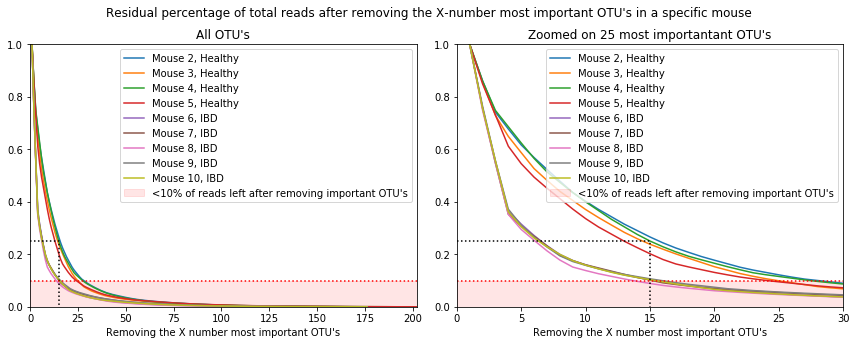

In [0]:
# Top 10 OTU's for every mouse
f,ax = plt.subplots(1,2, figsize=(12,5))

for mouse in range(2,11):
  quant_perc = data[mouse]['reads_quant_mean'].values
  quant_perc = np.sum(quant_perc, axis=1)
  index = np.argsort(quant_perc)
  title = ', Healthy' if mouse in set(range(2,6)) else ', IBD'
  ax[0].plot(range(len(np.cumsum(quant_perc[index]/quant_perc.sum())),0,-1), np.cumsum(quant_perc[index]/quant_perc.sum()), label="Mouse "+ str(mouse) + title)
  ax[1].plot(range(len(np.cumsum(quant_perc[index]/quant_perc.sum())),0,-1), np.cumsum(quant_perc[index]/quant_perc.sum()), label="Mouse "+ str(mouse) + title)

f.suptitle("Residual percentage of total reads after removing the X-number most important OTU's in a specific mouse")

for i in [0,1]:
  ax[i].axhspan(0, .1, alpha=0.1, color='r', label="<10% of reads left after removing important OTU's" )
  ax[i].set_xlabel("Removing the X number most important OTU's")
  ax[i].legend()
  ax[i].set_ylim((0,1))
  ax[i].plot([0,15,15], [0.25,0.25,0.0], 'k',linestyle=':')
  ax[i].plot([0,202], [0.1,0.1], 'r',linestyle=':')

ax[0].set_xlim((0,202))
ax[1].set_xlim((0,30))
ax[0].set_title("All OTU's")
ax[1].set_title("Zoomed on 25 most importantant OTU's")

f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclusion:**
 - In our IBD group after removing the 15 most important OTU's we have less then 10% of all reads left! 
   - **This indicates a lower biodiversity of microbiome in the IBD mice group!**
 - In our normal group have to removing up to 25-30 important OTU's to account for 90% of the reads: 
   - **In our control group the biodiversity is higher and the reads are better spread out over the different OTUs.**


### Focussing on the 5 most important OTU's (OTU_[1,2,3,4,5]) to grasp variation

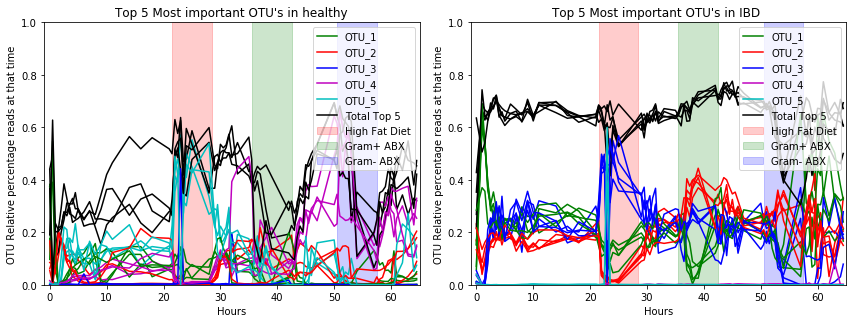

In [0]:
colors=['g','r','b','m','c']
otus = ['OTU_1', 'OTU_2', 'OTU_3', 'OTU_4', 'OTU_5']


f,ax=plt.subplots(1,2, figsize=(12,5))
for mouse in range(2,11):
  k = 0 if mouse in set(range(2,6)) else 1
  summed=data[mouse]['reads_perc'].loc['OTU_1']*0
  for i,otu in enumerate(otus):
    summed = summed + data[mouse]['reads_perc'].loc[otu]
    ax[k].plot(data[mouse]['times'], data[mouse]['reads_perc'].loc[otu], color=colors[i], label='_'*(not (mouse==6 or mouse==2))+otu )
  ax[k].plot(data[mouse]['times'], summed, color='k', label = '_'*(not (mouse==6 or mouse==2)) + 'Total Top 5')

for i in [0,1]:
  ax[i].axvspan(21.5, 28.5, alpha=0.2, color='r', label='High Fat Diet', )
  ax[i].axvspan(35.5, 42.5, alpha=0.2, color='g', label='Gram+ ABX', )
  ax[i].axvspan(50.5, 57.5, alpha=0.2, color='b', label='Gram- ABX', )
  ax[i].set_xlabel('Hours')
  ax[i].set_ylabel('OTU Relative percentage reads at that time')    
  ax[i].legend(loc="upper right")
  ax[i].set_ylim((0,1))
  ax[i].set_xlim((-1,65))

ax[0].set_title("Top 5 Most important OTU's in healthy")
ax[1].set_title("Top 5 Most important OTU's in IBD ")

f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.show()

**Conclusion:** 
 - a far lower inter-group variation within the IBD mice is observed **this indicates modeling the IBD group will be easier** 
 - related to this we observe that each of the 5 most important OTU's account for a higher percentage of the total reads in our IBD mice 
 - thus also in total we observe that the 5 most important OTU's (black line) accounts for +-50% of the reads at all time except for during the High Fat Diet (red region)
 - during the High fat diet the top-5 most important bugs account for a very low percentage of the total number of reads at that time: 
   - we are having overgrowth of other bacteria prevailing well under high fat diet environments.

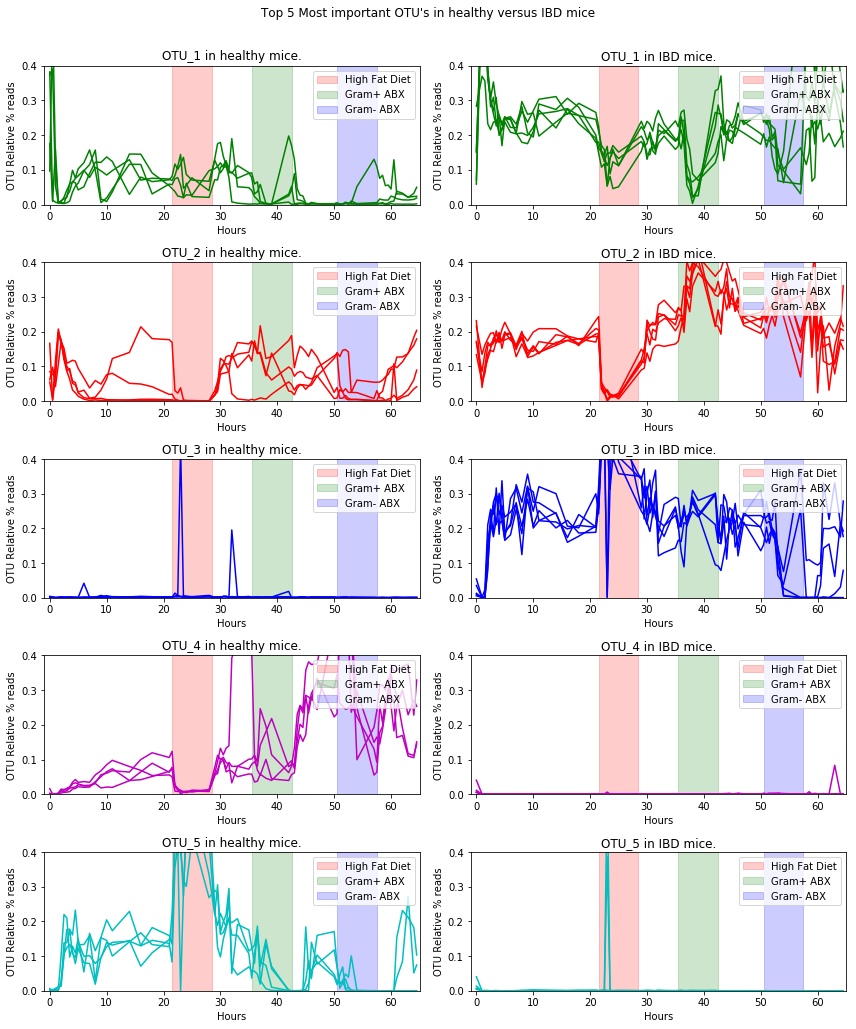

In [0]:
f,ax = plt.subplots(5,2, figsize=(12,15))
for mouse in range(2,11):
  for i,otu in enumerate(otus):
    k = 0 if mouse in set(range(2,6)) else 1
    title = 'healthy' if mouse in set(range(2,6)) else 'IBD'
    ax[i][k].plot(data[mouse]['times'], data[mouse]['reads_perc'].loc[otu], color=colors[i], label='_')
    ax[i][k].set_title(otu + ' in ' + title + ' mice.')
    ax[i][k].set_ylim((0, 0.4))
    ax[i][k].set_xlim((-1,65))
    if mouse == 2 or mouse ==6:
      ax[i][k].axvspan(21.5, 28.5, alpha=0.2, color='r', label='_'*(not (mouse==6 or mouse==2)) + 'High Fat Diet', )
      ax[i][k].axvspan(35.5, 42.5, alpha=0.2, color='g', label='_'*(not (mouse==6 or mouse==2)) + 'Gram+ ABX', )
      ax[i][k].axvspan(50.5, 57.5, alpha=0.2, color='b', label='_'*(not (mouse==6 or mouse==2)) + 'Gram- ABX', )
      ax[i][k].legend(loc="upper right")
      ax[i][k].set_xlabel('Hours')
      ax[i][k].set_ylabel('OTU Relative % reads')    

f.suptitle("Top 5 Most important OTU's in healthy versus IBD mice")
f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.show()

In [0]:
print('The 15 most important bugs are:')
important= ['OTU_1',  'OTU_2',  'OTU_3',  'OTU_4',  'OTU_5',  
            'OTU_6',  'OTU_7',  'OTU_8',  'OTU_9',  'OTU_10', 
            'OTU_11', 'OTU_13', 'OTU_15', 'OTU_17', 'OTU_18' ]
print(important)

The 15 most important bugs are:
['OTU_1', 'OTU_2', 'OTU_3', 'OTU_4', 'OTU_5', 'OTU_6', 'OTU_7', 'OTU_8', 'OTU_9', 'OTU_10', 'OTU_11', 'OTU_13', 'OTU_15', 'OTU_17', 'OTU_18']


### In every mouse they account for the following percentage Y of all reads at a certain time X.

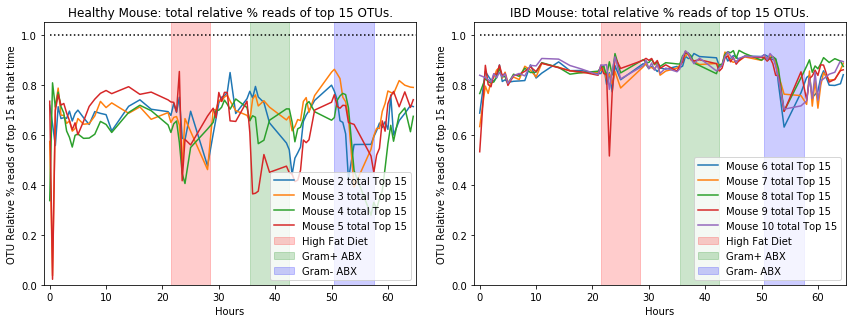

In [0]:
f,ax = plt.subplots(1,2, figsize=(12,5))
for mouse in range(2,11):
  k = 0 if mouse in set(range(2,6)) else 1
  summed=data[mouse]['reads_perc'].loc['OTU_1']*0
  for i,otu in enumerate(important):
    summed = summed + data[mouse]['reads_perc'].loc[otu]
  ax[k].plot(data[mouse]['times'], summed, label = 'Mouse ' + str(mouse) + ' total Top 15')
    
for i in [0,1]:
  ax[i].axvspan(21.5, 28.5, alpha=0.2, color='r', label='High Fat Diet', )
  ax[i].axvspan(35.5, 42.5, alpha=0.2, color='g', label='Gram+ ABX', )
  ax[i].axvspan(50.5, 57.5, alpha=0.2, color='b', label='Gram- ABX', )
  ax[i].set_xlabel('Hours')
  ax[i].set_ylabel('OTU Relative % reads of top 15 at that time') 
  ax[i].legend(loc="lower right")
  ax[i].set_ylim((0,1.05))
  ax[i].plot([0,73], [1,1], 'k',linestyle=':')
  ax[i].set_xlim((-1,65))

ax[0].set_title('Healthy Mouse: total relative % reads of top 15 OTUs.')
ax[1].set_title('IBD Mouse: total relative % reads of top 15 OTUs.')

f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.show()

**Conclusion:**
 - Again very clear observation that 15 OTUs account for the vast majority of the reads in our IBD mice at all time, and **even during perturbation the IBD group shows way lower biodiversity!**
 - During the perturbations (High Fat diet and Antibiotics) the top 15 OTUs account for less of the total reads at that moment.
 - This is normal since we selected on sorting the OTU's over all time, and during the majority of time we are not experiencing a perturbations.
 - It might make sense to add some important OTUs that specifically grow during these perturbations -> next step.

### Which OTUs are most prevalent during perturbations?

In [0]:
# Get the specific indices of when we observe perturbations
# Watch out: this indices is out of phase by 1 index between healthy and IBD
# The are not the same length
perturbation = list(np.arange(21.5, 29.0,0.5))+list(np.arange(35.5, 43.0,0.5))+list(np.arange(50.5, 58.0,0.5))
perturbation_times_healthy = { ind:time for ind,time in enumerate(data[2]['times']) if time in set(perturbation) }
perturbation_times_IBD = { ind:time for ind,time in enumerate(data[9]['times']) if time in set(perturbation) }

In [0]:
List_indices_perturbations_healthy = np.array(list(perturbation_times_healthy.keys()))
List_indices_perturbations_IBD = np.array(list(perturbation_times_IBD.keys()))

In [0]:
# Top 10 OTU's for every mouse during perturbations!
best_10={}
for mouse in range(2,6):
  quant_perc = data[mouse]['reads_quant_mean'].iloc[List_indices_perturbations_healthy].values
  quant_perc = np.sum(quant_perc, axis=1)
  index = np.argsort(quant_perc)
  best_10[mouse] = [int(s[4:]) for s in data[mouse]['reads_quant_mean'].index[index[-1:-14:-1]].values]
  print("The Top 10 Most prevelant OTU's for mouse ", mouse, " are :\n", best_10[mouse])
for mouse in range(6,11):
  quant_perc = data[mouse]['reads_quant_mean'].iloc[List_indices_perturbations_IBD].values
  quant_perc = np.sum(quant_perc, axis=1)
  index = np.argsort(quant_perc)
  best_10[mouse] = [int(s[4:]) for s in data[mouse]['reads_quant_mean'].index[index[-1:-14:-1]].values]
  print("The Top 10 Most prevelant OTU's for mouse ", mouse, " are :\n", best_10[mouse])

The Top 10 Most prevelant OTU's for mouse  2  are :
 [5, 3, 8, 7, 4, 11, 12, 9, 15, 13, 10, 16, 1]
The Top 10 Most prevelant OTU's for mouse  3  are :
 [3, 7, 5, 8, 11, 4, 12, 9, 10, 13, 15, 25, 18]
The Top 10 Most prevelant OTU's for mouse  4  are :
 [3, 5, 8, 7, 4, 16, 9, 15, 11, 12, 1, 10, 21]
The Top 10 Most prevelant OTU's for mouse  5  are :
 [3, 7, 5, 8, 4, 9, 12, 10, 11, 25, 15, 14, 20]
The Top 10 Most prevelant OTU's for mouse  6  are :
 [2, 1, 5, 3, 6, 7, 15, 10, 16, 8, 11, 21, 12]
The Top 10 Most prevelant OTU's for mouse  7  are :
 [5, 2, 1, 3, 6, 7, 15, 10, 16, 8, 11, 19, 21]
The Top 10 Most prevelant OTU's for mouse  8  are :
 [1, 2, 6, 5, 7, 3, 10, 16, 19, 15, 8, 21, 23]
The Top 10 Most prevelant OTU's for mouse  9  are :
 [1, 2, 5, 3, 6, 7, 10, 16, 11, 8, 19, 14, 4]
The Top 10 Most prevelant OTU's for mouse  10  are :
 [2, 5, 6, 1, 3, 7, 11, 10, 16, 18, 24, 15, 23]


In [0]:
concat = np.concatenate(list(best_10.values()))
otu, counts = np.unique(concat, return_counts=True)
for otu_x , count in (zip(otu, counts)):
  print('OTU', otu_x ,'\tappears ', count , "\ttimes in the top 10's of all mice")

OTU 1 	appears  5 	times in the top 10's of all mice
OTU 2 	appears  5 	times in the top 10's of all mice
OTU 3 	appears  9 	times in the top 10's of all mice
OTU 4 	appears  4 	times in the top 10's of all mice
OTU 5 	appears  9 	times in the top 10's of all mice
OTU 6 	appears  5 	times in the top 10's of all mice
OTU 7 	appears  9 	times in the top 10's of all mice
OTU 8 	appears  7 	times in the top 10's of all mice
OTU 9 	appears  4 	times in the top 10's of all mice
OTU 10 	appears  7 	times in the top 10's of all mice
OTU 11 	appears  6 	times in the top 10's of all mice
OTU 12 	appears  4 	times in the top 10's of all mice
OTU 13 	appears  2 	times in the top 10's of all mice
OTU 15 	appears  5 	times in the top 10's of all mice
OTU 16 	appears  6 	times in the top 10's of all mice
OTU 18 	appears  1 	times in the top 10's of all mice
OTU 19 	appears  1 	times in the top 10's of all mice
OTU 25 	appears  1 	times in the top 10's of all mice


**Observation:** OTU 12, 14, 16, 19, 21, 23, 25 all appear more then twice although they were not in the top 10 most important over the global time.
 - Yet **OTU 16** is appearing 7 times in the top 13 during perturbations, although it did not appear ONES in the global top-10s.
 - Also **OTU 12, 14, 19, 21, 23 and 25** appear 4, 2, 3, 4, 2,2 times in the top 13 during perturbations compared to almost never during the global top-10s.
 - **Are OTU 12, 19 and 23 overgrowing during perturbations?**

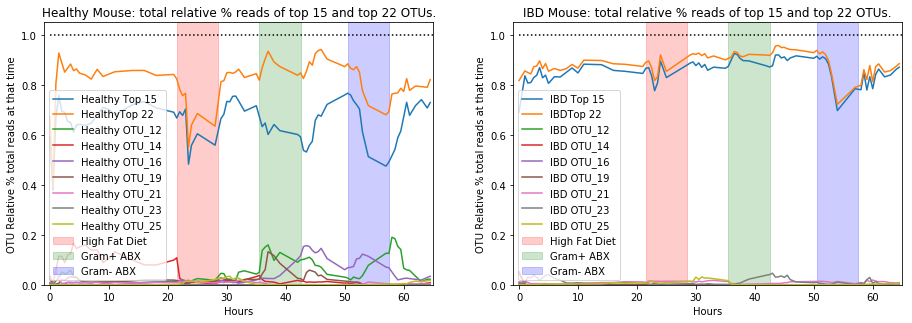

In [0]:
important15= ['OTU_1',  'OTU_2',  'OTU_3',  'OTU_4',  'OTU_5',  
            'OTU_6',  'OTU_7',  'OTU_8',  'OTU_9',  'OTU_10', 
            'OTU_11', 'OTU_13', 'OTU_15', 'OTU_17', 'OTU_18' ]

important19= ['OTU_1',  'OTU_2',  'OTU_3',  'OTU_4',  'OTU_5',  
            'OTU_6',  'OTU_7',  'OTU_8',  'OTU_9',  'OTU_10', 
            'OTU_11', 'OTU_13', 'OTU_15', 'OTU_17', 'OTU_18', 
            'OTU_12', 'OTU_14', 'OTU_16', 'OTU_19', 'OTU_21',
            'OTU_23', 'OTU_25' ]

f,ax = plt.subplots(1,2, figsize=(13,5))
for i in [0,1]:
  mouse_init=2 if i == 0 else 10
  summed_15=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_22=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU12=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU14=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU16=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU19=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU21=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU23=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU25=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  
  ranger = range(2,6) if i == 0 else range(6,11)
  for mouse in ranger:
    k = 0 if mouse in set(range(2,6)) else 1
    title = 'Healthy' if mouse in set(range(2,6)) else 'IBD'
    for i,otu in enumerate(important15):
      summed_15 = summed_15 + data[mouse]['reads_perc'].loc[otu]
    for i,otu in enumerate(important19):
      summed_22 = summed_22 + data[mouse]['reads_perc'].loc[otu]
    summed_OTU12 = summed_OTU12 + data[mouse]['reads_perc'].loc['OTU_12']
    summed_OTU14 = summed_OTU14 + data[mouse]['reads_perc'].loc['OTU_14']
    summed_OTU16 = summed_OTU16 + data[mouse]['reads_perc'].loc['OTU_16']
    summed_OTU19 = summed_OTU19 + data[mouse]['reads_perc'].loc['OTU_19']
    summed_OTU21 = summed_OTU21 + data[mouse]['reads_perc'].loc['OTU_21']
    summed_OTU23 = summed_OTU23 + data[mouse]['reads_perc'].loc['OTU_23']
    summed_OTU25 = summed_OTU25 + data[mouse]['reads_perc'].loc['OTU_25']

  total = 4 if mouse in set(range(2,6)) else 5
  ax[k].plot(data[mouse]['times'], summed_15/total, label = title + ' Top 15')
  ax[k].plot(data[mouse]['times'], summed_22/total, label = title + 'Top 22')
  ax[k].plot(data[mouse]['times'], summed_OTU12/total, label = title + ' OTU_12')
  ax[k].plot(data[mouse]['times'], summed_OTU14/total, label = title + ' OTU_14')
  ax[k].plot(data[mouse]['times'], summed_OTU16/total, label = title + ' OTU_16')
  ax[k].plot(data[mouse]['times'], summed_OTU19/total, label = title + ' OTU_19')
  ax[k].plot(data[mouse]['times'], summed_OTU21/total, label = title + ' OTU_21')
  ax[k].plot(data[mouse]['times'], summed_OTU23/total, label = title + ' OTU_23')
  ax[k].plot(data[mouse]['times'], summed_OTU25/total, label = title + ' OTU_25')

for i in [0,1]:
  ax[i].axvspan(21.5, 28.5, alpha=0.2, color='r', label='High Fat Diet', )
  ax[i].axvspan(35.5, 42.5, alpha=0.2, color='g', label='Gram+ ABX', )
  ax[i].axvspan(50.5, 57.5, alpha=0.2, color='b', label='Gram- ABX', )
  ax[i].set_xlabel('Hours')
  ax[i].set_ylabel('OTU Relative % total reads at that time')    
  ax[i].legend(loc="lower left")
  ax[i].set_ylim((0,1.05))
  ax[i].plot([0,73], [1,1], 'k',linestyle=':')
  ax[i].set_xlim((-1,65))

ax[0].set_title('Healthy Mouse: total relative % reads of top 15 and top 22 OTUs.')
ax[1].set_title('IBD Mouse: total relative % reads of top 15 and top 22 OTUs.')

f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.show()

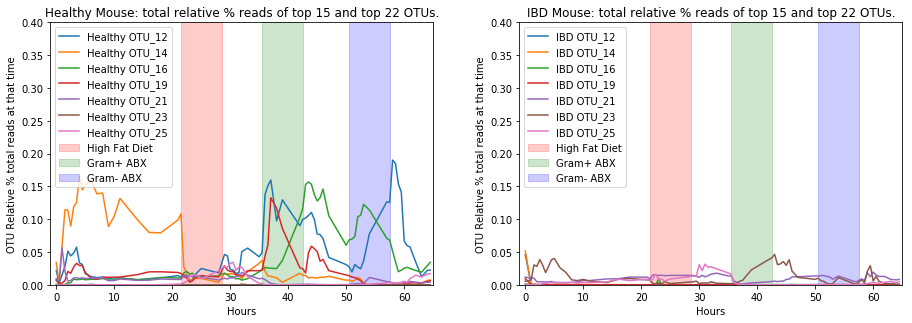

In [0]:
f,ax = plt.subplots(1,2, figsize=(13,5))
for i in [0,1]:
  mouse_init=2 if i == 0 else 10
  summed_15=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_19=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU12=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU14=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU16=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU19=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU21=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU23=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  summed_OTU25=data[mouse_init]['reads_perc'].loc['OTU_1']*0
  
  ranger = range(2,6) if i == 0 else range(6,11)
  for mouse in ranger:
    k = 0 if mouse in set(range(2,6)) else 1
    title = 'Healthy' if mouse in set(range(2,6)) else 'IBD'
    summed_OTU12 = summed_OTU12 + data[mouse]['reads_perc'].loc['OTU_12']
    summed_OTU14 = summed_OTU14 + data[mouse]['reads_perc'].loc['OTU_14']
    summed_OTU16 = summed_OTU16 + data[mouse]['reads_perc'].loc['OTU_16']
    summed_OTU19 = summed_OTU19 + data[mouse]['reads_perc'].loc['OTU_19']
    summed_OTU21 = summed_OTU21 + data[mouse]['reads_perc'].loc['OTU_21']
    summed_OTU23 = summed_OTU23 + data[mouse]['reads_perc'].loc['OTU_23']
    summed_OTU25 = summed_OTU25 + data[mouse]['reads_perc'].loc['OTU_25']

  total = 4 if mouse in set(range(2,6)) else 5
  ax[k].plot(data[mouse]['times'], summed_OTU12/total, label = title + ' OTU_12')
  ax[k].plot(data[mouse]['times'], summed_OTU14/total, label = title + ' OTU_14')
  ax[k].plot(data[mouse]['times'], summed_OTU16/total, label = title + ' OTU_16')
  ax[k].plot(data[mouse]['times'], summed_OTU19/total, label = title + ' OTU_19')
  ax[k].plot(data[mouse]['times'], summed_OTU21/total, label = title + ' OTU_21')
  ax[k].plot(data[mouse]['times'], summed_OTU23/total, label = title + ' OTU_23')
  ax[k].plot(data[mouse]['times'], summed_OTU25/total, label = title + ' OTU_25')

for i in [0,1]:
  ax[i].axvspan(21.5, 28.5, alpha=0.2, color='r', label='High Fat Diet', )
  ax[i].axvspan(35.5, 42.5, alpha=0.2, color='g', label='Gram+ ABX', )
  ax[i].axvspan(50.5, 57.5, alpha=0.2, color='b', label='Gram- ABX', )
  ax[i].set_xlabel('Hours')
  ax[i].set_ylabel('OTU Relative % total reads at that time')    
  ax[i].legend(loc="upper left")
  ax[i].set_ylim((0,.4))
  ax[i].set_xlim((-1,65))

ax[0].set_title('Healthy Mouse: total relative % reads of top 15 and top 22 OTUs.')
ax[1].set_title('IBD Mouse: total relative % reads of top 15 and top 22 OTUs.')

f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.show()

**Conclusion:** 
 - Adding these 7 OTU's to the 15 most important ones did improve the low coverage of reads during the perturbations; especially during antibioticcs in the healthy mice.
 - Specifically OTU_12(blue), OTU_16(green), and OTU_19(red) seems to grow well during antibiotic treatment yet only in healthy mouse: this might be clinically relevant.
  - In IBD we already cover most reads just with the top 15 and only OTU_23 seems to overgrow a little bit during antibiotic treatment.

### Final conclusion: It seems reasonable to further explore the interactions among these 22 important OTU'S covering 85-90% of all reads to model our system in addition with a 23th group bagging all the remaining OTU's.

End of section. Displaying the OTU Taxonomy below, if you want to know the genus/bacteria related to the OTU.

--------

In [0]:
display(data[2]['otu_taxonomy'].iloc[:25,2:])

,Phylum,Class,Order,Family,Genus
otuName,,,,,
OTU_1,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_2,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_3,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia
OTU_4,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_5,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia
OTU_6,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Parasutterella
OTU_7,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_8,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_9,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides


-------

### Link to collab: 

https://colab.research.google.com/drive/1Svy7kG93ODO75ejxtxpcH7R2-9zjDEkd

--------

### Here is a schematic of our mouse study.

https://www.dropbox.com/s/yxtoj3kox0rwv68/perturbation_timeline.png


-------